In [3]:
import vision_agent as va
import pandas as pd
import textwrap
import json
from IPython.display import Image

Get the LMM model

In [ ]:
model = va.lmm.get_lmm("llava")

## Analyze an image of document

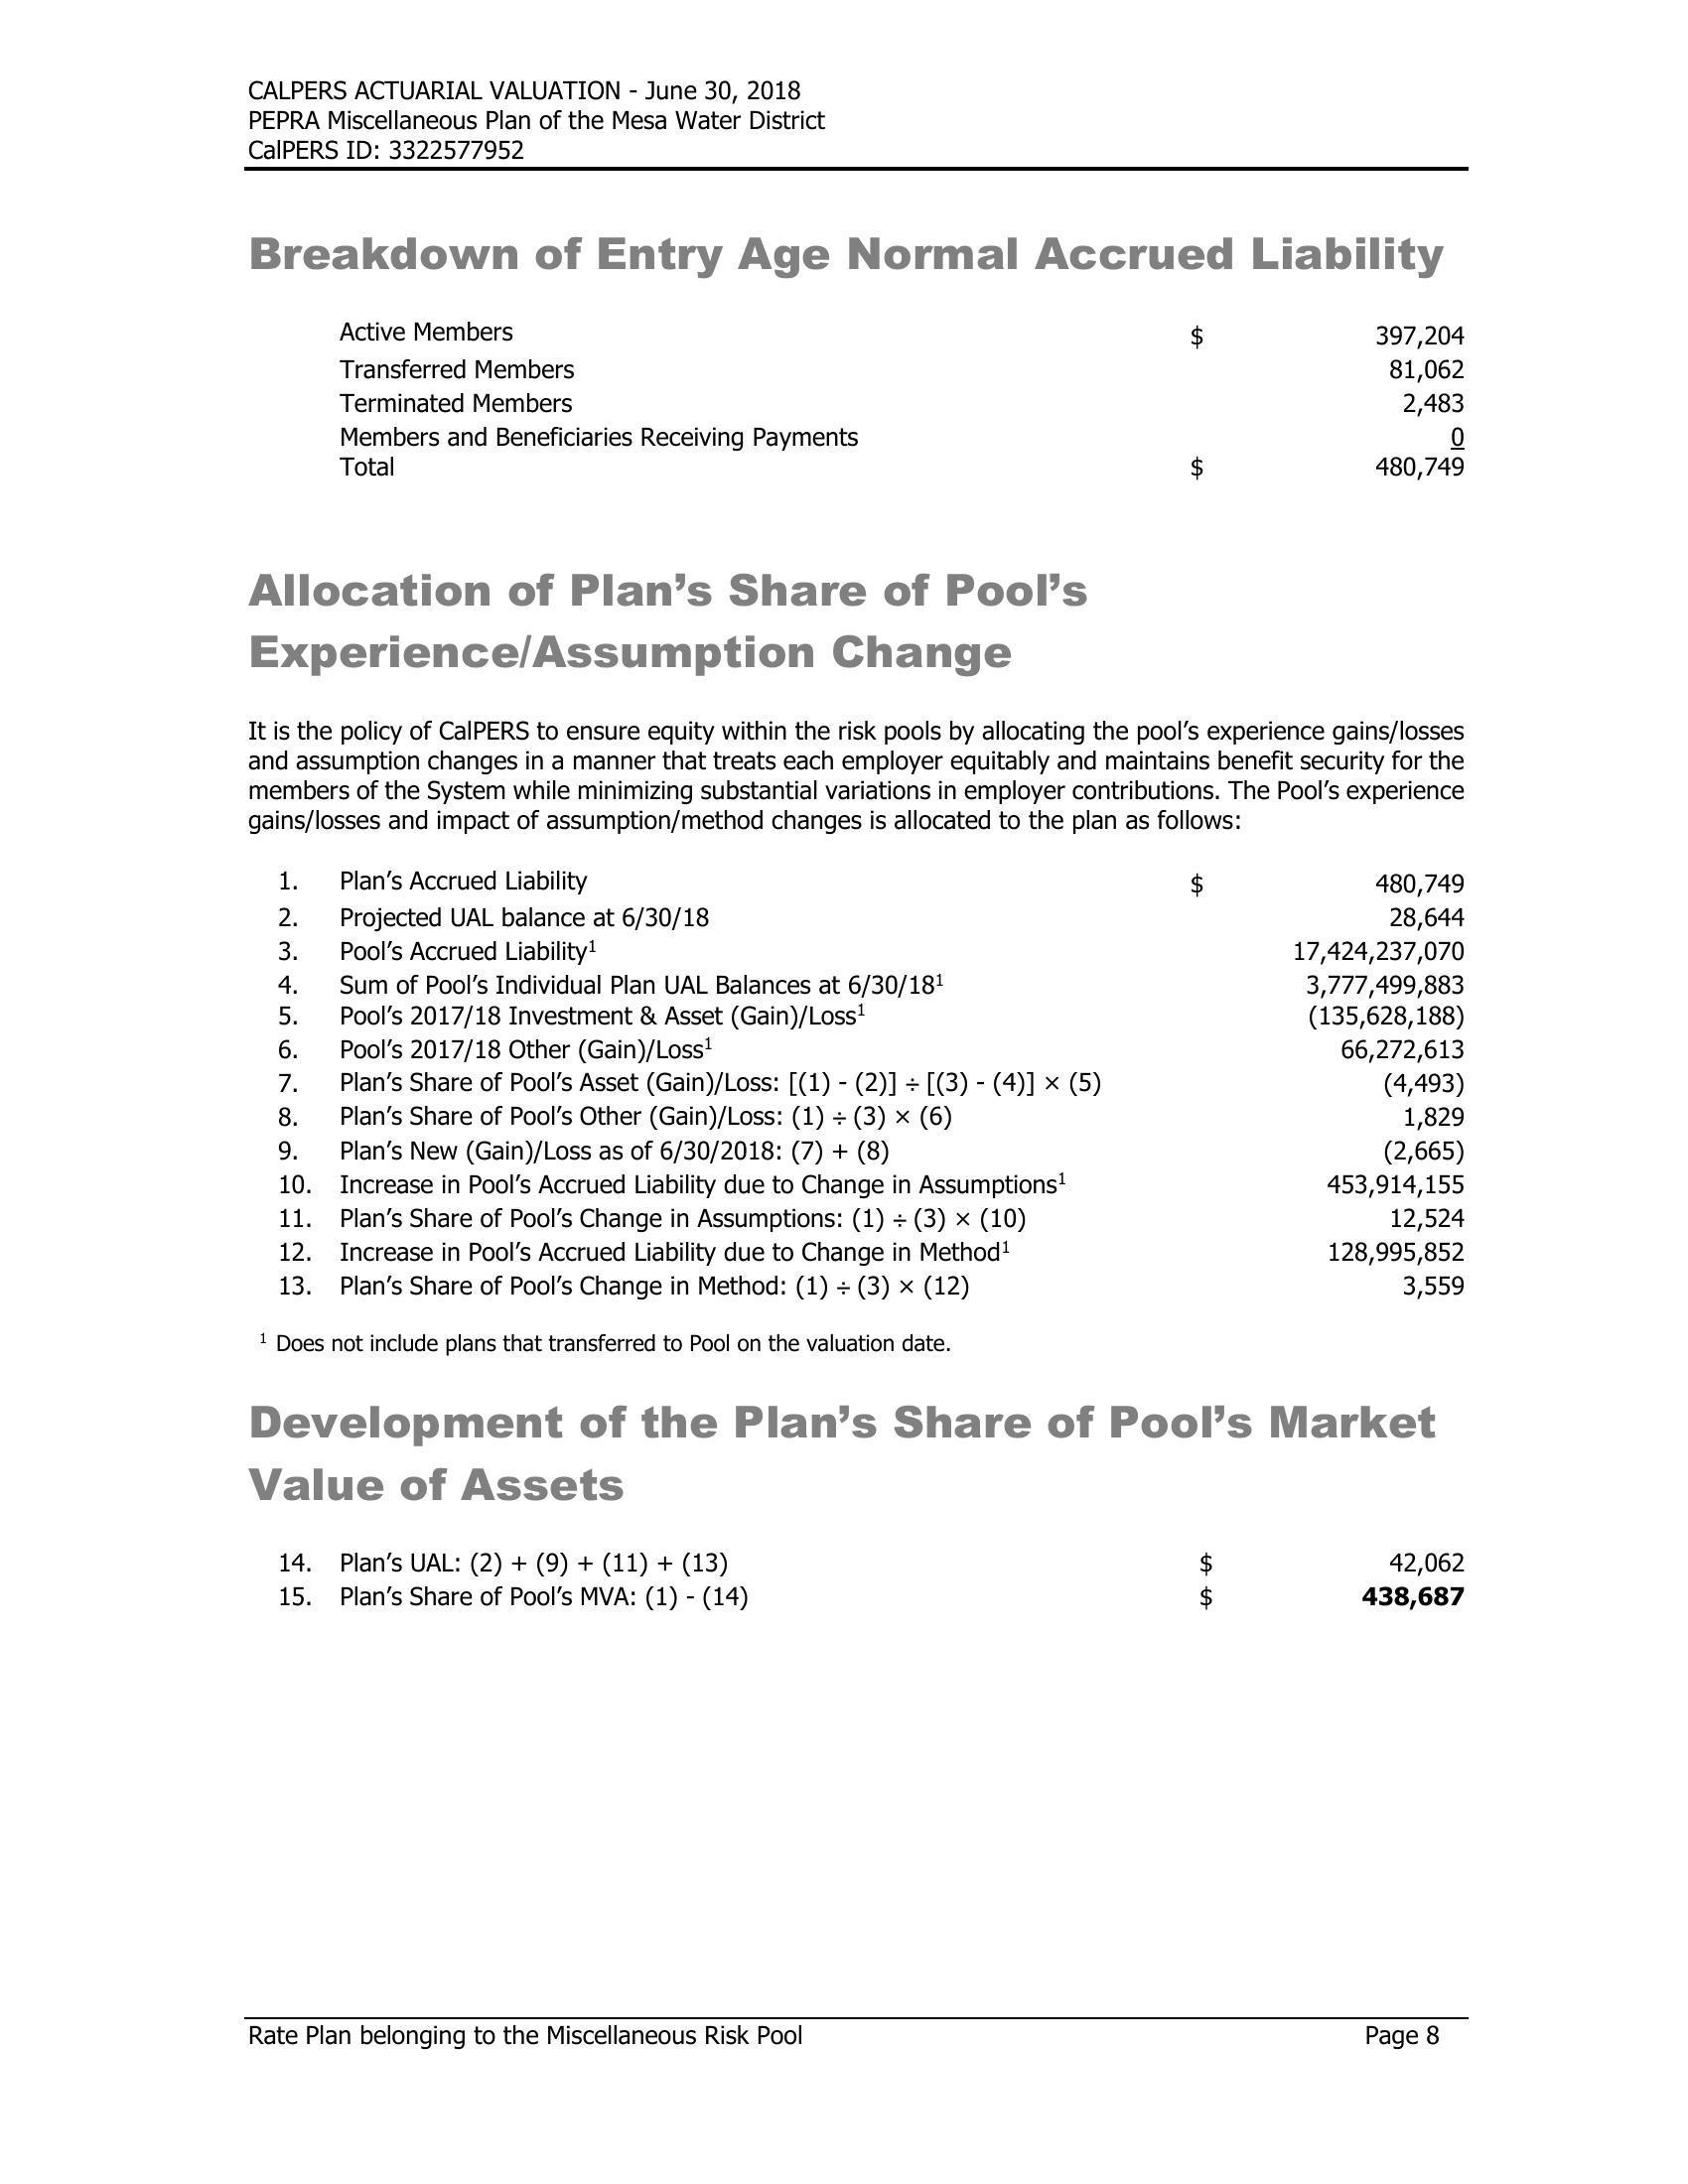

In [4]:
Image(filename="img/doc1.jpg")

Generate a response based on sample query and image.

In [ ]:
image_path = "img/doc1.jpg"
prompt = "Here is the image of a page from a document. Parse this document, if you can find a table and its columns in the page, print Table Title in json format and if not found Table title will be 'N/A'"
resp = model.generate(image_path, prompt, temperature=0.1, max_new_tokens=2000)
print(textwrap.fill(resp, 80))

In [ ]:
if "N/A" in resp:
    title = None
else:
    try:
        title = json.loads(resp[resp.find("{"):resp.find("}")+1])
    except:
        title = None
print(title['table_title'] if title else "N/A")

## Analyze CT scan images

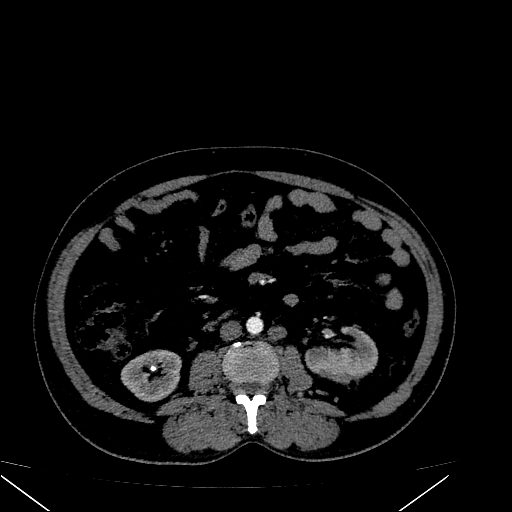

In [5]:
Image(filename="img/ct_scan1.jpg")

Here the goal is to get the LMM to look at a CT scan image and get it to respond whether it has any abnormalities

In [ ]:
data = {
    "Tumor": [],
    "Cyst": [],
    "Stone": [],
    "Normal": []
}
df = pd.DataFrame(data)

In [ ]:
image_path = "img/ct_scan1.jpg"
prompt = "Here is the image of kidney CT scan, Based on the CT image, categorize it as either 'Cyst' or 'Stone' or 'Tumor' or 'Normal' with probabilities to best of your ability. You can only respond with one category"
resp = model.generate(image_path, prompt, temperature=0.1, max_new_tokens=2000)
print(textwrap.fill(resp, 80))

In [ ]:
row = {col_name: "Probable" if col_name in resp else "Not Probable" for col_name in df.columns}

In [ ]:
df.loc[len(df.index)] = row
df